In [2]:
# 60009220023	-Paritosh Shukla 
# 60009220120	-Prathmesh raut 
# 60009220127	-Vivek Nair 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('heart_disease_data.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
1,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
2,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
3,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
4,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


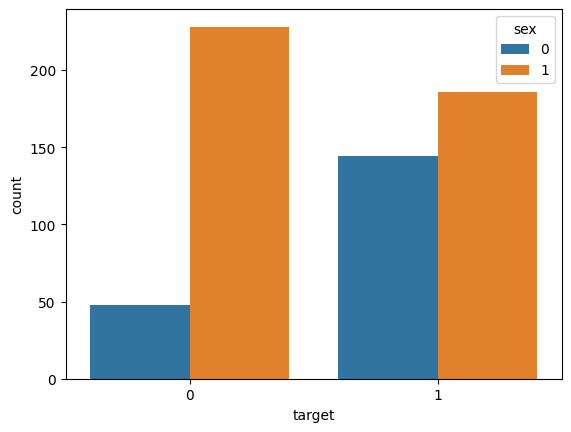

In [10]:
sns.countplot(x='target',data=df,hue='sex')
plt.show()

In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


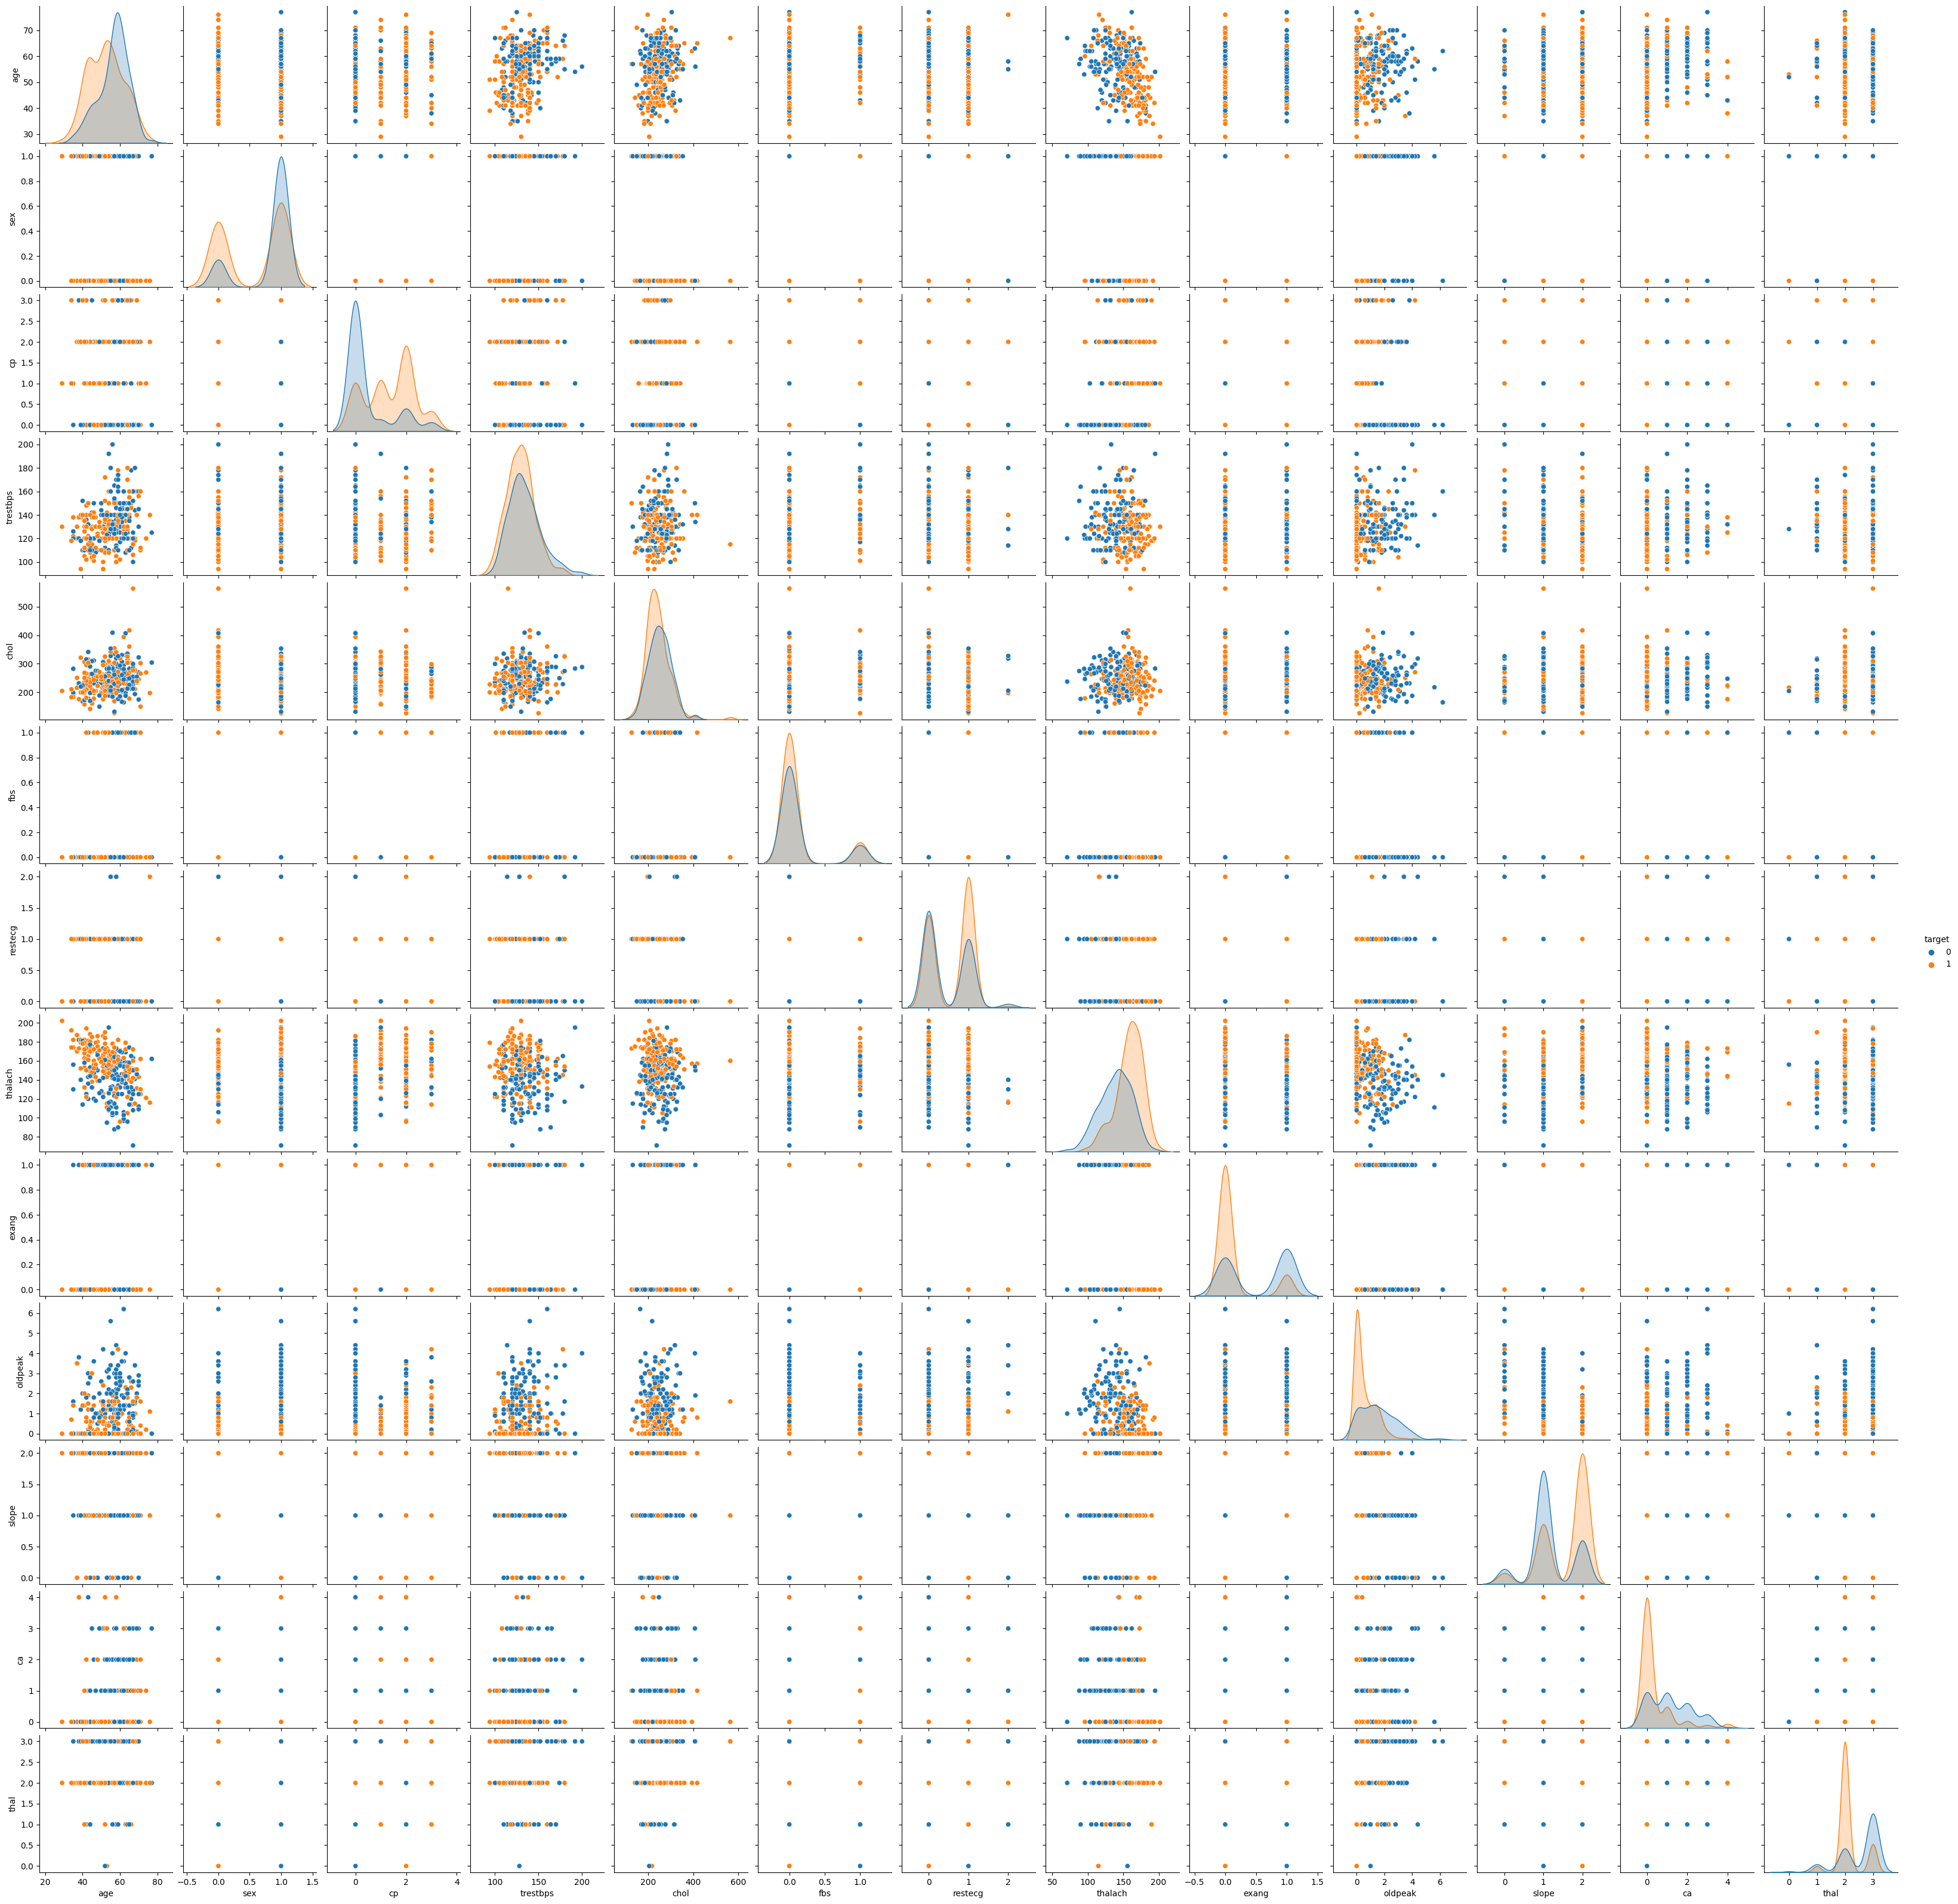

In [14]:
sns.pairplot(df,hue='target')
plt.show()

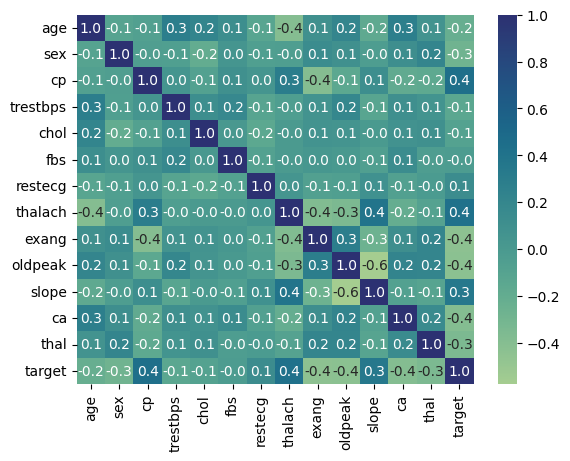

In [23]:
sns.heatmap(df.corr(),annot=True, fmt=".1f",cmap='crest')
plt.show()

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
1,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
2,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
3,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
4,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


# To check Outliers

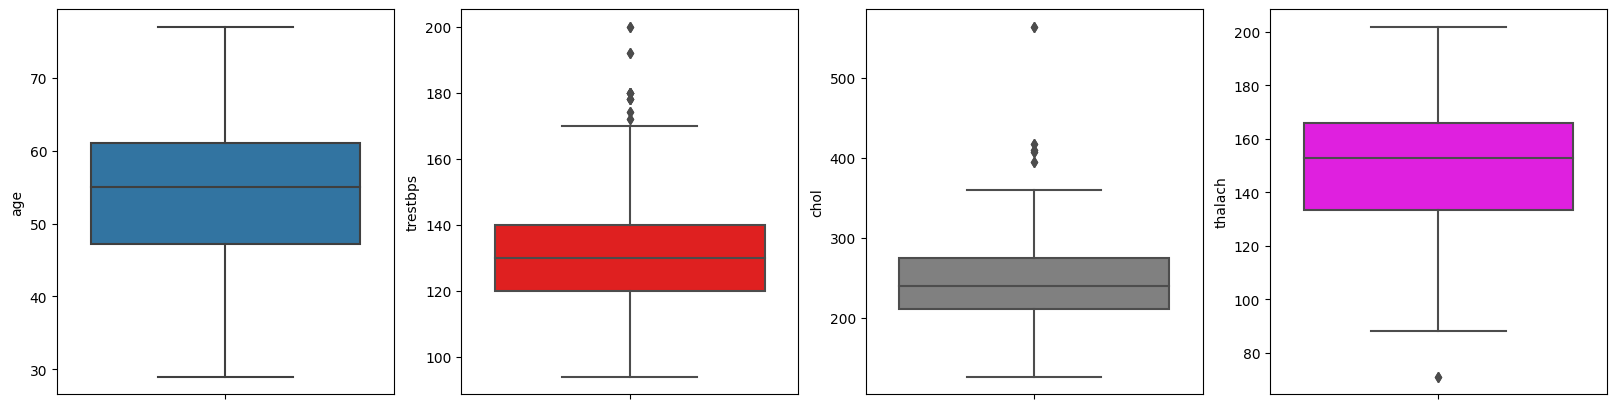

In [50]:
fig,ax=plt.subplots(ncols=4,nrows=1,figsize=(20,5))
ax=ax.flatten()
sns.boxplot(y='age',data=df,ax=ax[0])
sns.boxplot(y='trestbps',data=df,ax=ax[1],color='red')
sns.boxplot(y='chol',data=df,ax=ax[2],color='grey')
sns.boxplot(y='thalach',data=df,ax=ax[3],color='magenta')
plt.show()

# To check Distributions

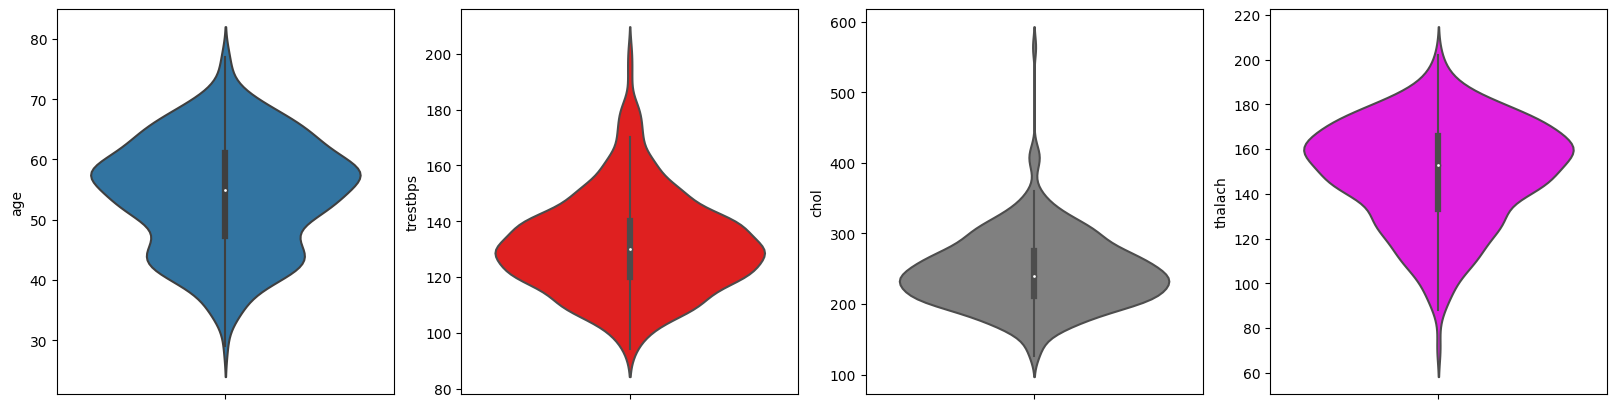

In [53]:
fig,ax=plt.subplots(ncols=4,nrows=1,figsize=(20,5))
ax=ax.flatten()
sns.violinplot(y='age',data=df,ax=ax[0])
sns.violinplot(y='trestbps',data=df,ax=ax[1],color='red')
sns.violinplot(y='chol',data=df,ax=ax[2],color='grey')
sns.violinplot(y='thalach',data=df,ax=ax[3],color='magenta')
plt.show()

# Count of Classified Attributes

<Axes: xlabel='thal', ylabel='count'>

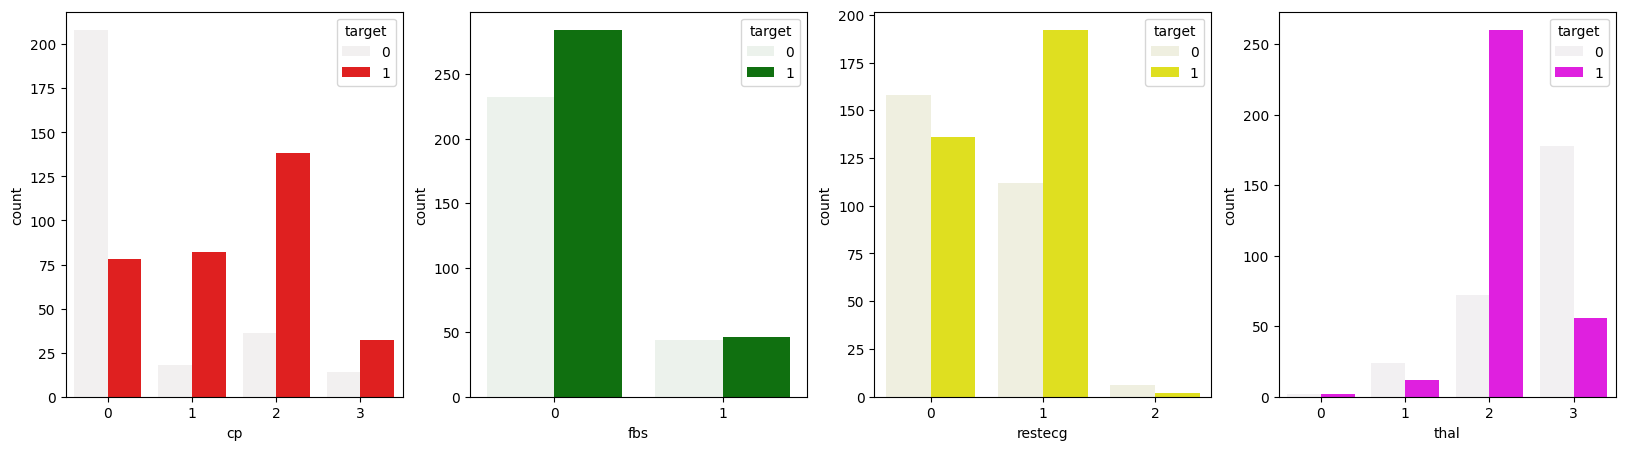

In [57]:
fig,ax=plt.subplots(ncols=4,nrows=1,figsize=(20,5))
ax=ax.flatten()
sns.countplot(x='cp',data=df,ax=ax[0],color='red',hue='target')
sns.countplot(x='fbs',data=df,ax=ax[1],color='green',hue='target')
sns.countplot(x='restecg',data=df,ax=ax[2],color='yellow',hue='target')
sns.countplot(x='thal',data=df,ax=ax[3],color='magenta',hue='target')

In [58]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [75]:
def Accuracy_test(x_train,y_train,x_test,y_test):
    Dict={'LogisticRegression':LogisticRegression(),'SVC':SVC(kernel='rbf'),'RandomForestClassifier':RandomForestClassifier(n_estimators=10),'ExtraTreesClassifier':ExtraTreesClassifier(n_estimators=10),' GaussianNB': GaussianNB(),'BernoulliNB':BernoulliNB(),'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=10),'DecisionTreeClassifier':DecisionTreeClassifier()}
    names=[]
    Accuracy=[]
    for key,items in Dict.items():
        classifier=items
        classifier.fit(x_train,y_train)
        y_pred=classifier.predict(x_test)
        names.append(key)
        Accuracy.append(accuracy_score(y_test,y_pred))
    fd=pd.DataFrame({'Classifier':names,'Accuracy':Accuracy})
    return fd
        

In [76]:
fd=Accuracy_test(x_train,y_train,x_test,y_test)

In [77]:
fd

,Classifier,Accuracy
0,LogisticRegression,0.844262
1,SVC,0.877049
2,RandomForestClassifier,0.950820
3,ExtraTreesClassifier,0.983607
4,GaussianNB,0.827869
5,BernoulliNB,0.860656
6,KNeighborsClassifier,0.868852
7,DecisionTreeClassifier,0.967213


In [81]:
fd.sort_values(by='Accuracy',ascending=False,inplace=True)
fd.reset_index(inplace=True)

In [83]:
fd.drop('index',axis=1,inplace=True)

In [86]:
fd

,Classifier,Accuracy
0,ExtraTreesClassifier,0.983607
1,DecisionTreeClassifier,0.967213
2,RandomForestClassifier,0.950820
3,SVC,0.877049
4,KNeighborsClassifier,0.868852
5,BernoulliNB,0.860656
6,LogisticRegression,0.844262
7,GaussianNB,0.827869


In [85]:
#Extra Tress Classifier has highest Accuracy

# Trying Deep Learning 

In [128]:
import tensorflow as tf

In [129]:
ann=tf.keras.Sequential()

In [130]:
ann.add(tf.keras.layers.Dense(units=100,activation='relu'))

In [131]:
ann.add(tf.keras.layers.Dense(units=100,activation='relu'))

In [132]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [133]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [134]:
ann.fit(x_train,y_train,batch_size=28,epochs=200)

Epoch 1/200
18/18 [==============================] - 1s 3ms/step - loss: 0.6025 - accuracy: 0.6942
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8306
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3514 - accuracy: 0.8512
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8574
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.8719
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2927 - accuracy: 0.8740
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2752 - accuracy: 0.8926
Epoch 8/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2664 - accuracy: 0.8905
Epoch 9/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.9008
Epoch 10/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.9029
Epoch 11/

18/18 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 84/200
18/18 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 85/200
18/18 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 86/200
18/18 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 87/200
18/18 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 88/200
18/18 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 89/200
18/18 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 90/200
18/18 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 91/200
18/18 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 92/200
18/18 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 93/200


18/18 [==============================] - 0s 2ms/step - loss: 3.3070e-04 - accuracy: 1.0000
Epoch 163/200
18/18 [==============================] - 0s 2ms/step - loss: 3.2710e-04 - accuracy: 1.0000
Epoch 164/200
18/18 [==============================] - 0s 2ms/step - loss: 3.2117e-04 - accuracy: 1.0000
Epoch 165/200
18/18 [==============================] - 0s 2ms/step - loss: 3.1532e-04 - accuracy: 1.0000
Epoch 166/200
18/18 [==============================] - 0s 2ms/step - loss: 3.0777e-04 - accuracy: 1.0000
Epoch 167/200
18/18 [==============================] - 0s 2ms/step - loss: 3.0161e-04 - accuracy: 1.0000
Epoch 168/200
18/18 [==============================] - 0s 2ms/step - loss: 2.9863e-04 - accuracy: 1.0000
Epoch 169/200
18/18 [==============================] - 0s 2ms/step - loss: 2.9467e-04 - accuracy: 1.0000
Epoch 170/200
18/18 [==============================] - 0s 2ms/step - loss: 2.9233e-04 - accuracy: 1.0000
Epoch 171/200
18/18 [==============================] - 0s 2ms/step - 

In [135]:
y_pred=ann.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [136]:
y_pred=(y_pred>0.5)
y_pred=y_pred.astype(int)

In [137]:
accuracy_score(y_test,y_pred)

0.9836065573770492

In [ ]:
#  Conclusion- our model predicted 0.98360 accuracy and therefore,our model is sucessfull in predicting Heart disease.
